In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Machine Learning/ANZ/ANZ synthesised transaction dataset.xlsx', sheet_name = 'DSynth_Output_100c_3m_v3')

In [ ]:
df['balance_left'] = [y-z if x == 'debit' else y+z for x,y,z in zip(df['movement'], df['balance'],df['amount'])]
df.head().T

,0,1,2,3,4
status,authorized,authorized,authorized,authorized,authorized
card_present_flag,1,0,1,1,1
bpay_biller_code,NaN,NaN,NaN,NaN,NaN
account,ACC-1598451071,ACC-1598451071,ACC-1222300524,ACC-1037050564,ACC-1598451071
currency,AUD,AUD,AUD,AUD,AUD
long_lat,153.41 -27.95,153.41 -27.95,151.23 -33.94,153.10 -27.66,153.41 -27.95
txn_description,POS,SALES-POS,POS,SALES-POS,SALES-POS
merchant_id,81c48296-73be-44a7-befa-d053f48ce7cd,830a451c-316e-4a6a-bf25-e37caedca49e,835c231d-8cdf-4e96-859d-e9d571760cf0,48514682-c78a-4a88-b0da-2d6302e64673,b4e02c10-0852-4273-b8fd-7b3395e32eb0
merchant_code,NaN,NaN,NaN,NaN,NaN
first_name,Diana,Diana,Michael,Rhonda,Diana


In [ ]:
df = df.drop_duplicates()

df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
balance_left                float64
dtype: object

In [ ]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount,balance_left
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588,14794.693727
std,0.398029,0.0,31503.722652,10.046343,592.599934,31535.843039
min,0.000000,0.0,0.240000,18.000000,0.100000,-5017.950000
25%,1.000000,0.0,3158.585000,22.000000,16.000000,3172.975000
50%,1.000000,0.0,6432.010000,28.000000,29.000000,6511.540000
75%,1.000000,0.0,12465.945000,38.000000,53.655000,12887.760000
max,1.000000,0.0,267128.520000,78.000000,8835.980000,269308.480000


In [ ]:
df[df['amount']>8000]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,balance_left
2401,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,62647.22,2018-08-20,M,40,NaN,NaN,2018-08-20T13:00:00.000+0000,8835.98,b608ce5142664a79af4fa071a886c8f7,Australia,CUS-1816693151,NaN,credit,71483.20
6529,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,70242.78,2018-09-20,M,40,NaN,NaN,2018-09-20T13:00:00.000+0000,8835.98,854ded55d0034ac8b9e91e16334768ca,Australia,CUS-1816693151,NaN,credit,79078.76
10429,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,77054.31,2018-10-19,M,40,NaN,NaN,2018-10-19T13:00:00.000+0000,8835.98,873a3f11d03d41a99c55a5b1a3850e1a,Australia,CUS-1816693151,NaN,credit,85890.29
10430,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,85890.29,2018-10-19,M,40,NaN,NaN,2018-10-19T13:00:00.000+0000,8835.98,d996300131a641c8bf25f86e1aef9bc6,Australia,CUS-1816693151,NaN,credit,94726.27


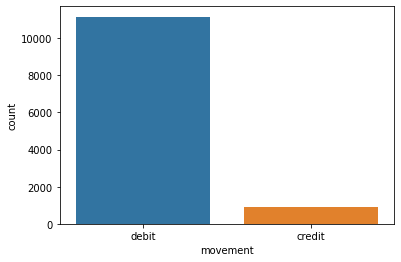

In [ ]:
sns.countplot(df.movement)

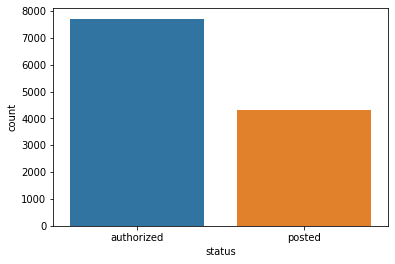

In [ ]:
sns.countplot(df.status)

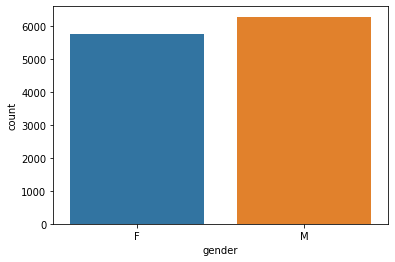

In [ ]:
sns.countplot(df.gender)

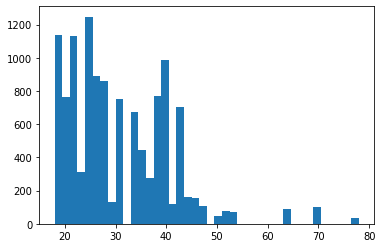

In [ ]:
plt.hist(df.age, bins =40)
plt.show()

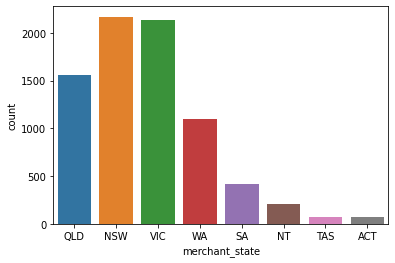

In [ ]:
sns.countplot(df.merchant_state)

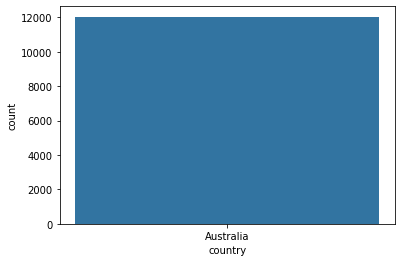

In [ ]:
sns.countplot(df.country)

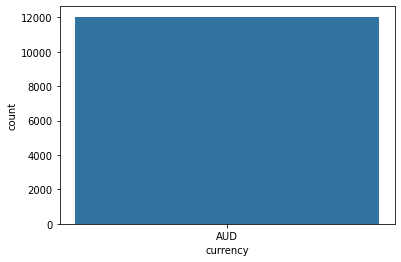

In [ ]:
sns.countplot(df.currency)

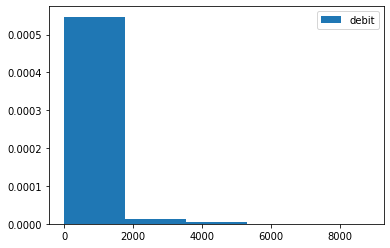

In [ ]:
plt.hist(df.amount, bins = 5, density =True, label = df.movement)
plt.legend()
plt.show()

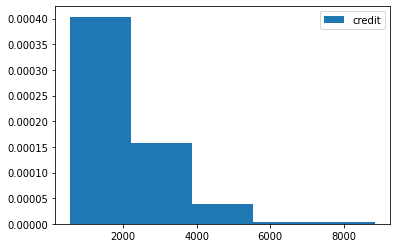

In [ ]:
plt.hist(df[df['movement'] == 'credit']['amount'], bins = 5, density =True, label = df[df['movement'] == 'credit']['movement'])
plt.legend()
plt.show()

In [ ]:
df.amount.quantile(0.99)

3195.01

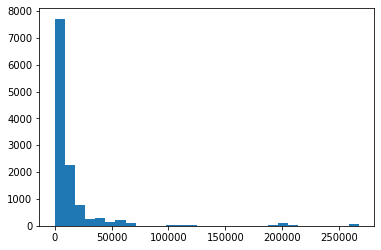

In [ ]:
plt.hist(df.balance, bins =30)
plt.show()

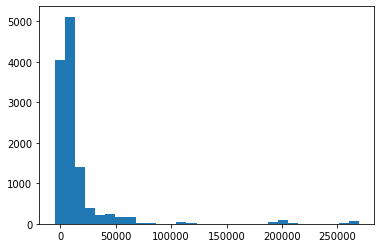

In [ ]:
plt.hist(df.balance_left, bins =30)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
df.customer_id.nunique()

100

In [ ]:
#timedelta(df.date.min(), df.date.max())
total_time = df.date.max() - df.date.min()
total_time

Timedelta('91 days 00:00:00')

In [ ]:
df.merchant_id.nunique()

5725

In [ ]:
df.txn_description.nunique()

6

In [ ]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
balance_left         12001
dtype: int64

In [ ]:
df['month'] = pd.DatetimeIndex(df.date).month
df['time'] = pd.DatetimeIndex(df.date).time
df['movement'].value_counts(normalize  = True)

debit     0.926679
credit    0.073321
Name: movement, dtype: float64

In [ ]:
cal = df.groupby(['movement'])['amount'].agg([sum, np.mean])
cal = cal.reset_index()
cal

,movement,sum,mean
0,credit,1676576.85,1898.728029
1,debit,586707.35,52.572343


In [ ]:
gain = cal['sum'][0] + cal['sum'][1]
gain/91

24871.254945054912

In [ ]:
loc = df.groupby('merchant_state')['amount'].agg(sum)
loc.sort_values()

merchant_state
TAS      1962.93
ACT      4876.68
NT       9168.89
SA      16776.57
WA      33992.06
QLD     53483.45
VIC     87584.00
NSW    102021.77
Name: amount, dtype: float64

In [ ]:
df1 = df.groupby('date')['amount'].agg(sum)

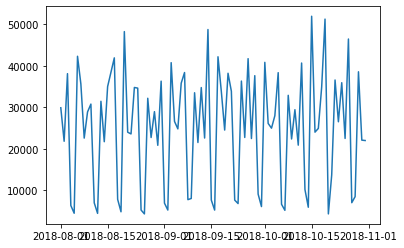

In [ ]:
plt.plot(df1)

In [ ]:
df.shape

(12043, 26)

In [ ]:
debit = df[df['movement'] == 'debit']
credit = df[df['movement'] == 'credit']
print(debit.shape + credit.shape)

(11160, 26, 883, 26)


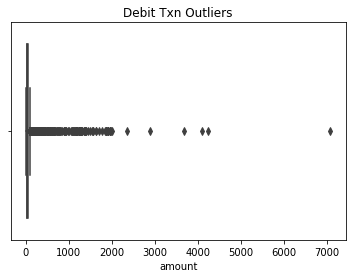

Text(0.5, 1.0, 'Credit Txn Outliers')

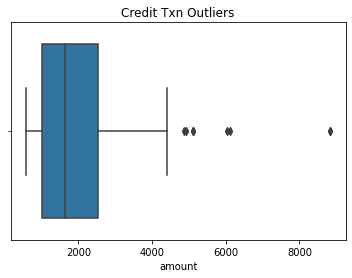

In [ ]:
sns.boxplot(debit['amount'])
plt.title('Debit Txn Outliers')
plt.show()
sns.boxplot(credit['amount'])
plt.title('Credit Txn Outliers')
plt.show()

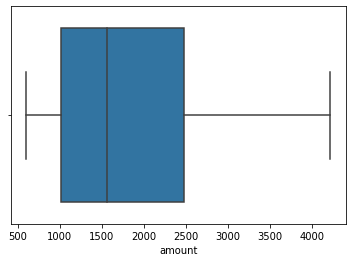

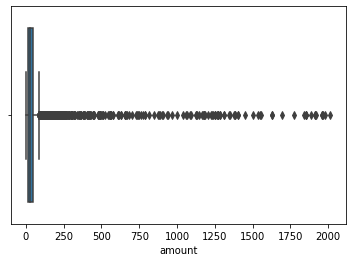

In [ ]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df, column, ulim):
	    low = 0
	    high = ulim
	    quant_df = df[column].quantile([low, high])
	    df = df[(df[column] > quant_df.loc[low]) 
               & (df[column] < quant_df.loc[high])]
	    return df
	
credit = remove_outlier(credit, 'amount', 0.98)
debit = remove_outlier(debit, 'amount', 0.9995)
sns.boxplot(credit['amount'])
plt.show()
sns.boxplot(debit['amount'])
plt.show()  

In [ ]:
print(debit.shape, credit.shape)

(11149, 26) (846, 26)


In [ ]:
credita = credit.groupby('date')['amount'].agg(sum)
credita.mean()

23593.50461538462

In [ ]:
debita = debit.groupby('date')['amount'].agg(sum)
debita.mean()

6180.025494505494

In [ ]:
total = debit.append(credit)
total.shape

(11995, 26)

In [ ]:
total['month'] = pd.DatetimeIndex(total.date).month
#total['week'] = 0
count = [abs]
for i in range(len(total.date)):
  for j in range(7):
    count.append(i)
    
count = count[1:]    
total['count'] = pd.Series(count)


total.tail().T

,11995,12000,12001,12003,12004
status,posted,posted,posted,posted,posted
card_present_flag,NaN,NaN,NaN,NaN,NaN
bpay_biller_code,0,0,0,0,0
account,ACC-1973887809,ACC-819621312,ACC-2920611728,ACC-1799207998,ACC-2171593283
currency,AUD,AUD,AUD,AUD,AUD
long_lat,115.78 -31.90,145.04 -37.85,144.96 -37.76,150.68 -33.79,146.94 -36.04
txn_description,PAY/SALARY,PAY/SALARY,PAY/SALARY,PAY/SALARY,PAY/SALARY
merchant_id,NaN,NaN,NaN,NaN,NaN
merchant_code,0,0,0,0,0
first_name,Antonio,Michele,Tyler,Susan,Fernando


In [ ]:
total = total.groupby(['count','date','movement'])['amount'].agg([sum])
total = total.reset_index()
#totol = total.drop( [['amount']['mean'], ['month']['sum']], axis =1)
total.tail()

,count,date,movement,sum
2230,1716,2018-10-31,debit,196.50
2231,1717,2018-10-31,debit,233.67
2232,1718,2018-10-31,debit,555.07
2233,1719,2018-10-31,debit,223.73
2234,1720,2018-10-31,debit,97.09


In [ ]:
total.dtypes

count                int64
date        datetime64[ns]
movement            object
sum                float64
dtype: object

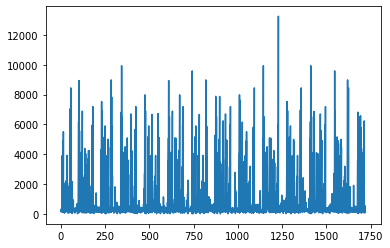

In [ ]:
plt.plot(total['count'], total['sum'])

No handles with labels found to put in legend.


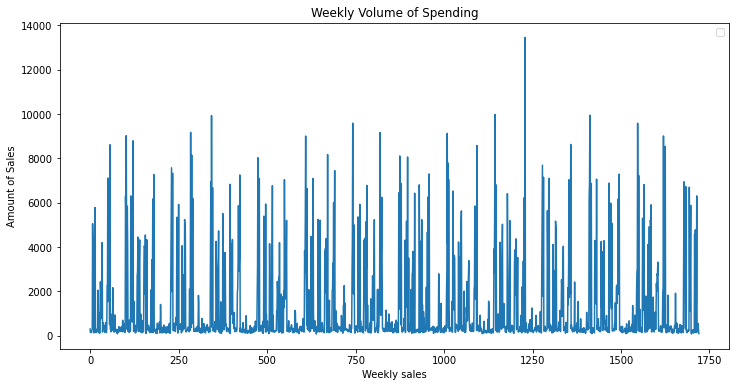

In [ ]:
total = total.groupby('count')['sum'].agg(sum)
total = total.reset_index()
plt.figure(figsize=(12,6))
plt.plot(total['count'], total['sum'])
plt.xlabel('Weekly sales')
plt.ylabel('Amount of Sales')
plt.title('Weekly Volume of Spending')
plt.legend()
plt.show()

In [ ]:
debita = debita.reset_index()
debita.head()

,date,amount
0,2018-08-01,5546.44
1,2018-08-02,7558.09
2,2018-08-03,8035.90
3,2018-08-04,6296.05
4,2018-08-05,4426.50


In [ ]:
count = [abs]
for i in range(len(debita.date)):
  for j in range(7):
    count.append(i)
    
count = count[1:]    
debita['count'] = pd.Series(count)
debita.tail()

,date,amount,count
86,2018-10-27,6971.48,12
87,2018-10-28,8438.11,12
88,2018-10-29,2519.18,12
89,2018-10-30,2089.32,12
90,2018-10-31,5148.15,12


In [ ]:
credit.date.min()

Timestamp('2018-08-01 00:00:00')

In [ ]:
credit.date.max()

Timestamp('2018-10-31 00:00:00')

In [ ]:
credita = credita.reset_index()
credita.head()

,date,amount
0,2018-08-01,24321.50
1,2018-08-02,14228.23
2,2018-08-03,29484.68
3,2018-08-06,34651.61
4,2018-08-07,19973.02


In [ ]:
count = [abs]
for i in range(len(credita.date)):
  for j in range(7):
    count.append(i)
    
count = count[1:]    
credita['count'] = pd.Series(count)
credita.tail()

,date,amount,count
60,2018-10-25,14228.23,8
61,2018-10-26,29484.68,8
62,2018-10-29,31624.66,8
63,2018-10-30,19973.02,9
64,2018-10-31,16818.98,9


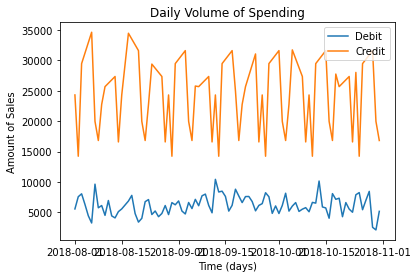

In [ ]:
#plt.figure(figsize=(12,6))
plt.plot(debita['date'], debita['amount'])
plt.plot(credita['date'], credita['amount'])
plt.xlabel('Time (days)')
plt.ylabel('Amount of Sales')
plt.title('Daily Volume of Spending')
plt.legend(['Debit','Credit'])
plt.show()

In [ ]:
debit.merchant_state.value_counts()

NSW    2165
VIC    2127
QLD    1553
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [ ]:
debit.merchant_suburb.value_counts()

Melbourne        253
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
                ... 
Old Guildford      1
Myrniong           1
South Penrith      1
Thirlmere          1
Trinity Park       1
Name: merchant_suburb, Length: 1609, dtype: int64